**Business Problem Statement** 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Business Goal:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Techinical Goal : **Multiple linear regression** is used to solve the above business goal which refers to a statistical technique that uses two or more independent variables to predict the outcome of a dependent variable. The technique enables analysts to determine the variation of the model and the relative contribution of each independent variable in the total variance.

##Step 1: Reading and Understanding the Data

In [0]:
# Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore') 

#Model related imports 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_colwidth', -1)

The data dictionary of the loan dataset is loaded here for reference


Dataset characteristics

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Now, lets understand the data further by displaying few records


In [0]:
pd.set_option('display.max_columns', None) #This option will help if the columns are trimmed in the display 
df=pd.read_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/mlr/day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The number of columns and rows are , 

In [0]:
df.shape

Out[3]: (730, 16)

In [0]:
df.info(verbose=True, show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the above displayed info , we have 730 observations , 15 initial features where the target/dependent variable is **'cnt'**. There is not much NA values as per the above stats , lets perform one more analysis to confirm whether we have a NA values

In [0]:
df.isna().sum()

Out[5]: instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can clearly observe, there is no missing values in the dataset based on the above stats and by looking at the below data of unique counts, it appears some of the numerical columns are actually categorical in nature. For example - 0 and 1 for year and holiday

In [0]:
df.nunique()

Out[6]: instant       730
dteday        730
season        4  
yr            2  
mnth          12 
holiday       2  
weekday       7  
workingday    2  
weathersit    3  
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

Based on the initial Exploratory Data analysis, we can remove the below columns

- The column **'Instant'** doesnt add more value which is just a inline index, we can remove it or use it as index column. Since it doesnt vary much with index, we can drop the column
- **dteday** - yr and month is already available as a seperate column, if we derive day, we would end up adding additional 31 features . The columns weekday/holiday have more business significance which would complement to data more than the day column , hence its safe to assume day column need not be dervived 
- The representation of the target variable **'cnt'** is **'casual'** and **'registered'** . For example **cnt=985** is represented as **331(casual) + 654(registered)**. So its safe to assume the causal and registered are different representation of target variable and can be removed 

We can also infer and based on the data understanding from data dictionary , the columns weathersit, workingday, weekday,mnth,yr,season,holiday are categorical in nature

In [0]:
df=df.drop(['instant','casual','registered','dteday'],axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Lets convert the values of categorical columns to categorical type to interpret the data and also this would be one of the data preparation task which has to be performed before Model building.

- **yr,workingday, holiday** - The binary outcome columns like 0 or 1 need not be converted because its easy to interpret and also scaling is achieved by default 

- **weathersit** : 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy => Lets assign **'sunny'**
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist => Lets assign **'Misty'**
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds => **'Drizzle'**
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog => **"stromy"**


- **mnth** : month ( 1 to 12) - Jan to Dec has to be assigned 

- **season** : we can assign (1:spring, 2:summer, 3:fall, 4:winter), however it appears weathersit indirectly represent the season. However , we can eliminate the column in the later stage if we find enough evidence on Multicollinearity

- **weekday** : day of the week(0 being Tuesday, 6 being Monday)

In [0]:
df.mnth = df.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df.season=df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df.weathersit=df.weathersit.map({1:'sunny',2:'Misty',3:'Drizzle',4:'stromy'})
df.weekday = df.weekday.map({5: 'sun',6: 'mon',0: 'tue',1: 'wed',2: 'thu',3: 'fri',4: 'sat'})
df.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,sunny,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,sunny,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,sunny,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,1,sunny,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,mon,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,tue,0,sunny,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,wed,1,sunny,6.184153,7.54440,48.2917,14.958889,1321


In [0]:
df.nunique()

Out[9]: season        4  
yr            2  
mnth          12 
holiday       2  
weekday       7  
workingday    2  
weathersit    3  
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

##Step 2: Visualising the Data

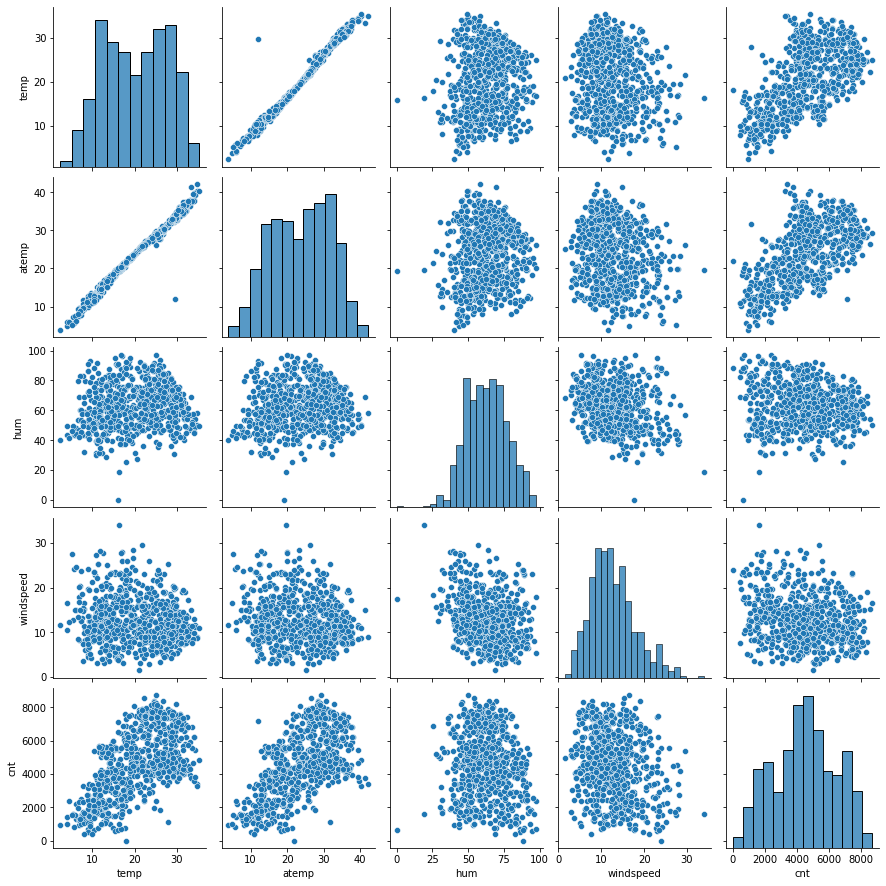

In [0]:
num_cols = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(df[num_cols])
plt.show()

**Inference from the above chart is** ,
- atemp vs temp have a high correlation , we need to retain one and drop the other - This will be performed during Multicollinearity Analysis 
- atemp/temp have good correlation with target variable cnt compared to other numerical variables

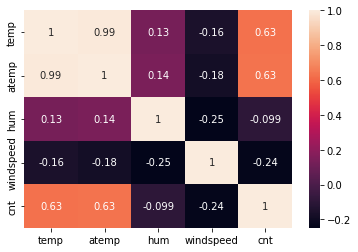

In [0]:
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

The ineference what we made using the pairplot is inline with the heatmap and the correlation values are quantified. Its evident temp & atemp has Multicollinearity

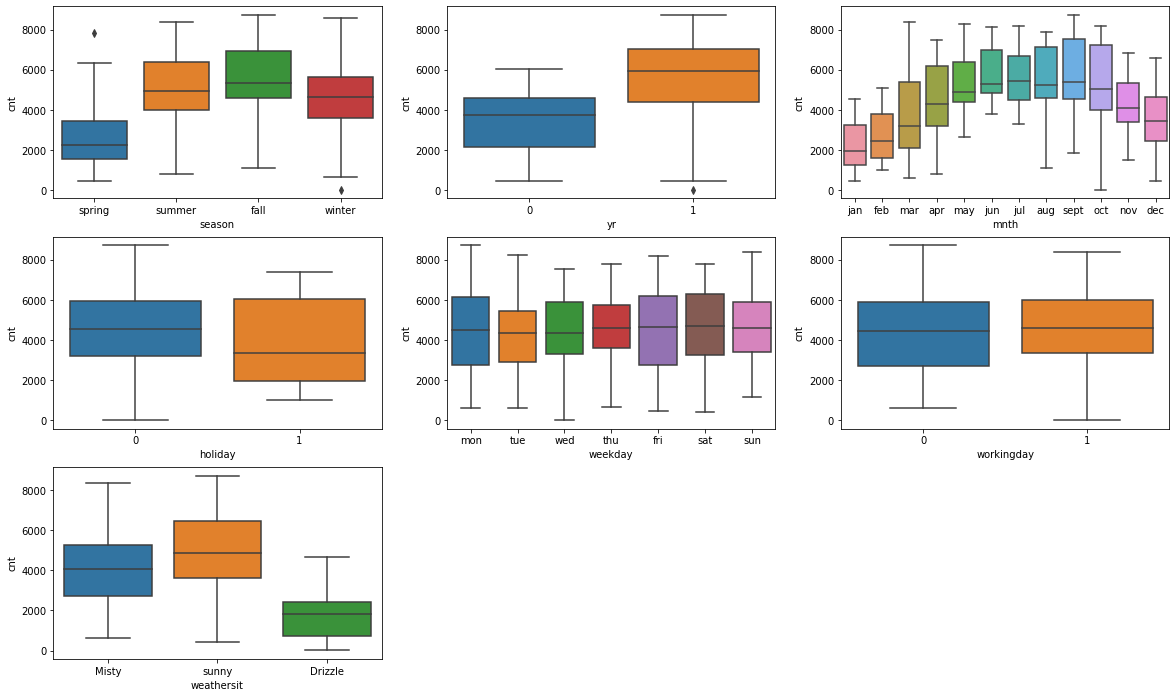

In [0]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

Inferences based on the above box plot analysis for the categorical variables are , 

- The value of Cnt is comparatively less in the spring season, the bike-sharing company can do better promotion and marketing campaigns to boost the business during the Spring

- 2019 has more users compared to 2018, bike-sharing systems are slowly gaining popularity, and the demand for these bikes is increasing every year

- The median value of the number of users is more in the months of May to Oct, compared to other months

- When its not a holiday, the number of users is comparatively high

- By looking at the upper whisker, Sun & Mon seems to be the highest. However median value is almost the same for all the days

- The number of users is slightly higher when comparing the 25th, 50th and 75th percentile values during the working day

- During sunny, more users seem to use the bike and during Drizzle the number of users is drastically reduced, The bike system app can consider providing rainproof helmets which might help to increase the number of users


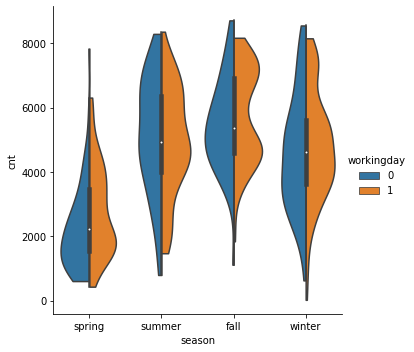

In [0]:
sns.catplot(data=df, x="season", y="cnt", hue="workingday", kind="violin",cut=0,split=True)
plt.show()

It's quite evident Spring has the least number of users and it's also interesting to observe, that users prefer to use the biking system during the working day.

<Figure size 720x864 with 0 Axes>

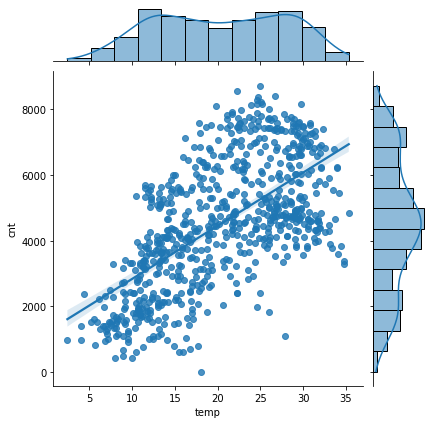

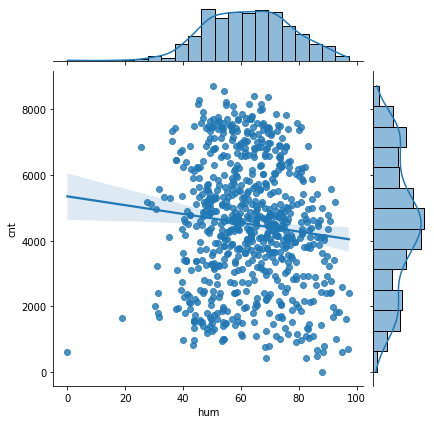

In [0]:
plt.figure(figsize=(10, 12))

sns.jointplot(
    data=df, x="temp", y="cnt",kind="reg")

sns.jointplot(
    data=df, x="hum", y="cnt",kind="reg")
plt.show()


The reg line for **temp** is perfect because of the high correlation , we attempted the same with **hum** but its not strongly correlated with cnt as like temp

## Step 3: Creating dummies for categorical variables

Categorical variable with say 'n' levels, the idea of dummy variable creation is to build 'n-1' variables, indicating the levels.

- season : season (1:spring, 2:summer, 3:fall, 4:winter) =>  The final output should have 3 levels 
- yr : year (0: 2018, 1:2019) => No change required, its already in expected format
- mnth : month ( 1 to 12) =>  The final output should have 11 levels 
- holiday : weather day is a holiday or not => No change required, its already in expected format
- weekday : day of the week => The final output should have 6 levels 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. => No change required, its already in expected format
- weathersit - the data dict have 4 level but the data only has 3 level, so lets retain all 3 level with an assmption we might get the data for the missing level in the future iteration

In [0]:
def create_dummies(dummy_cols,df,dropFirst):

    """
    Create Dummies for multiple columns , the output levels will be n-1 
 
    Args:
        a (list of string): The list of categorical column names.
        b (dataframe): The input dataframe object.
        c (boolean) : To determine whether to drop the first derived dummy feature , in this case the levels will be n instead of n-1 
 
    Returns:
        dataframe: The output dataframe with all dummy columns and the orginal categorical columns are dropped.
    """
    df = pd.get_dummies(data=df,columns=dummy_cols,drop_first=dropFirst)
    return df   

In [0]:
dummy_Cols=['season','mnth','weekday']
df=create_dummies(dummy_Cols,df,True)
df=create_dummies(['weathersit'],df,False)

In [0]:
df.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Drizzle,weathersit_Misty,weathersit_sunny
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
df.shape

Out[18]: (730, 31)

Now we have 30 independent and 1 depedent variable 

## Step 4: Train Test Split

In [0]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [0]:
print(df_train.shape)
print(df_test.shape)


(510, 31)
(219, 31)


## Step 5: Feature Scaling

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

- Standardisation 
- MinMax scaling (we will use this method for this problem statement)


In [0]:
#Let us scale continuous variables, the rest of the variables are already in the scale of 0,1 
num_vars = ['temp','atemp','hum','windspeed']

#Min Max scaler helps to scale the value between 0,1
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [0]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Drizzle,weathersit_Misty,weathersit_sunny
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


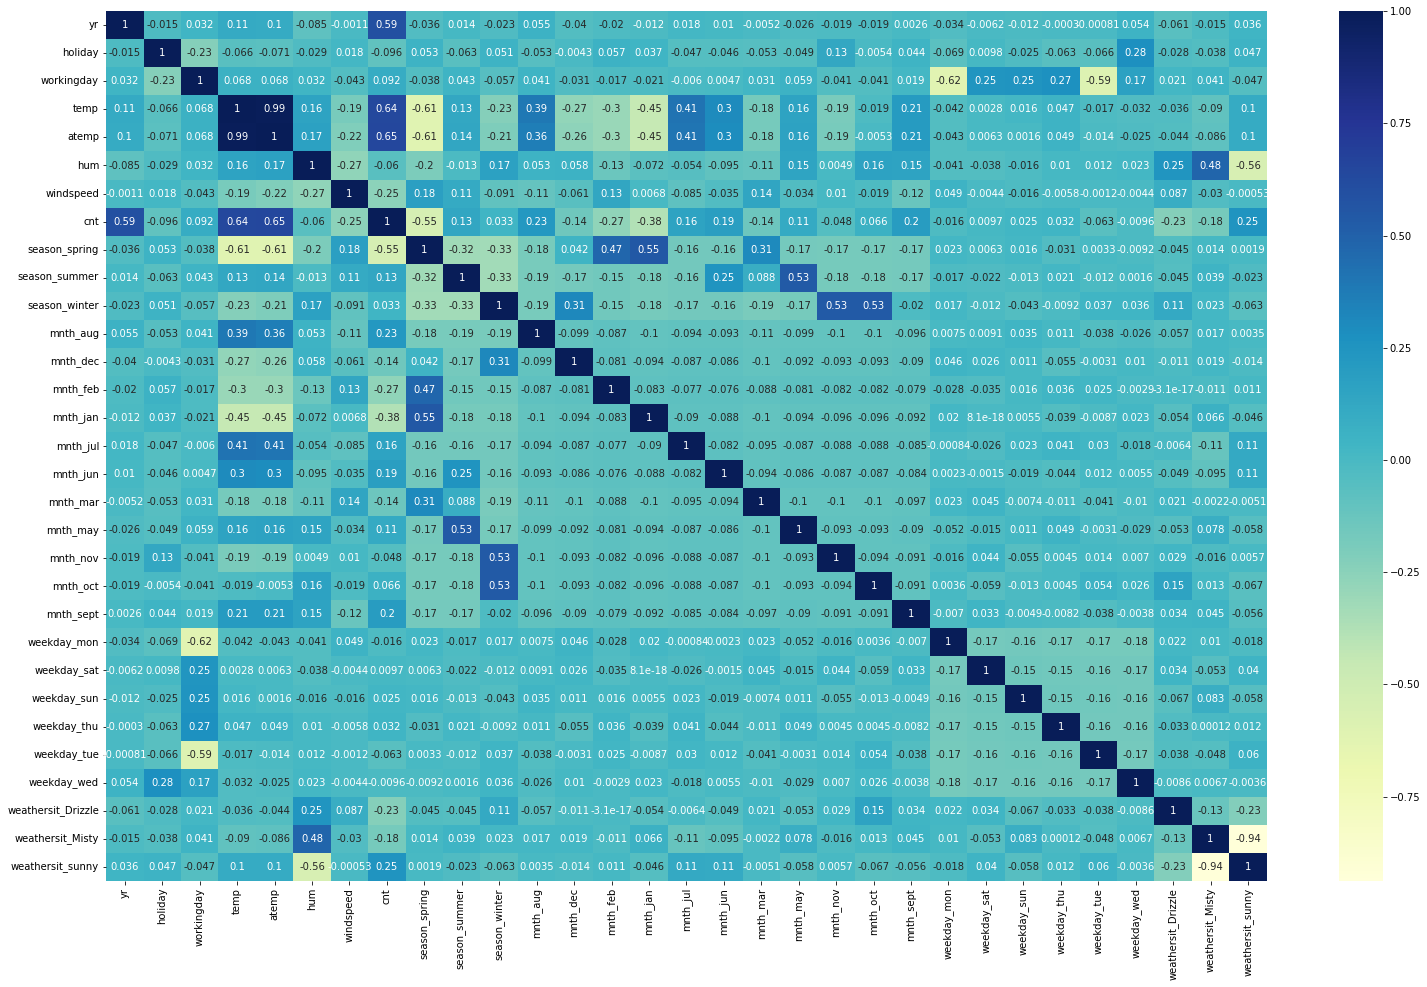

In [0]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Though the above chart shows good number of features with correlation , it looks exhaustive and we are not interested in the features which are less correlated. Lets filter down by selecting the features which are correlated > 50%

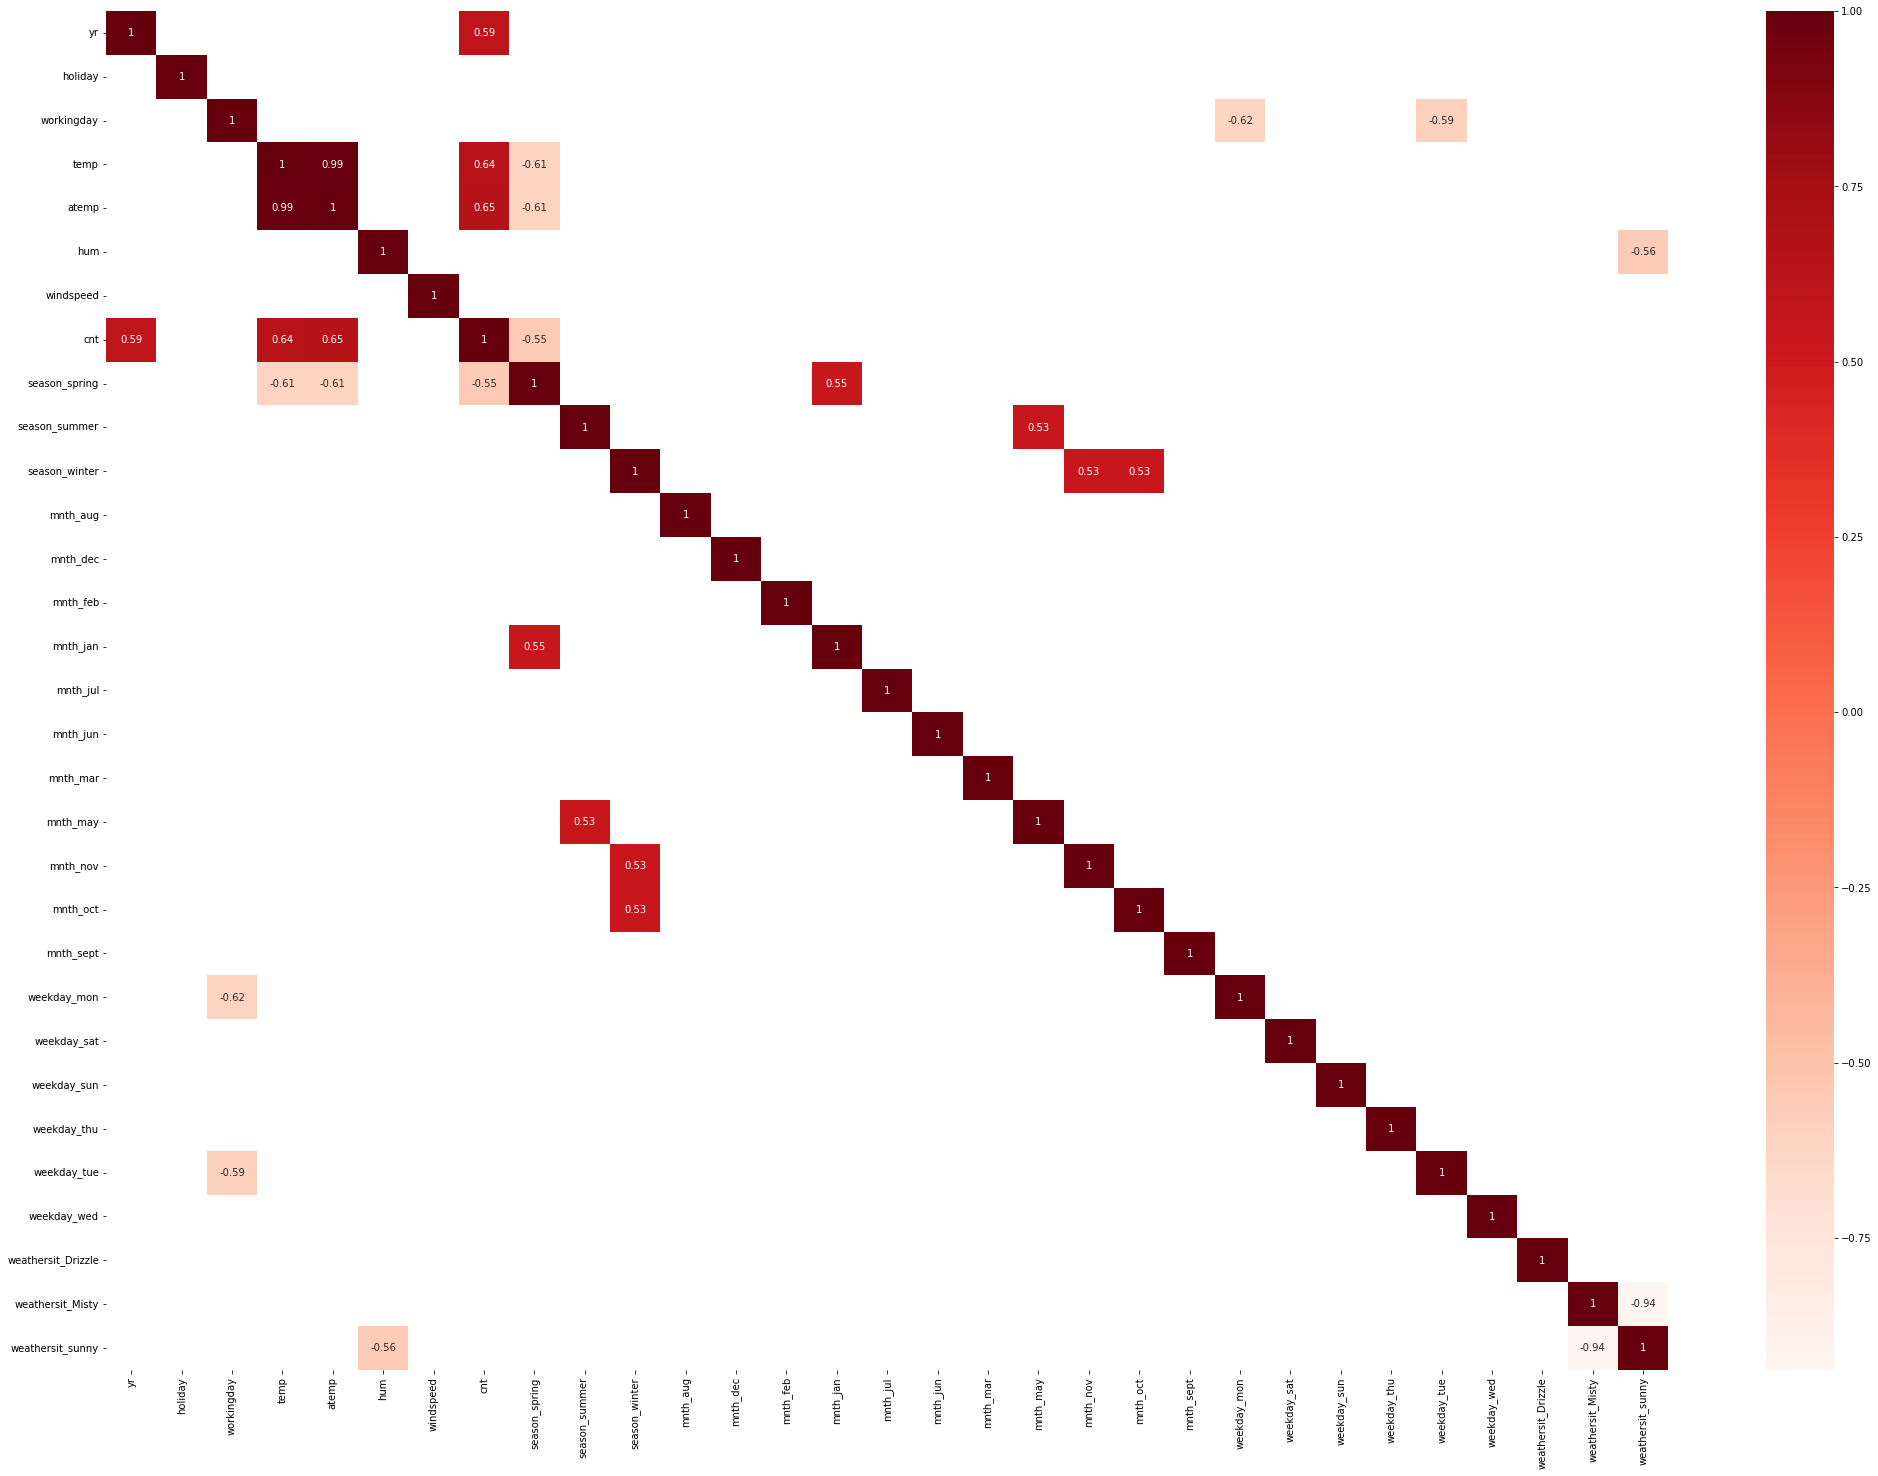

In [0]:
df_train_corr=df_train.corr()
golden_features_list = df_train_corr[abs(df_train_corr) > 0.5]
plt.figure(figsize=[35,25])
sns.heatmap(golden_features_list,cmap='Reds',annot=True)
plt.show()

##Step 6: Feature Selection 

We can adopt Manual feature elimination techniques like Forward or Backward feature elimination using VIF and p values as a metric to check the significance. However, the process is very much time consuming for the wide dataset which has more number of features (features > 10), so we will adopt hybrid approch , we will use Recursive Feature elimination rechnique , an automated way and later we can use statistical metrics to further trim the unwanted features 

In [0]:
y_train = df_train.pop('cnt')
X_train = df_train

In [0]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [0]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


Out[27]: [('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 14),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 4),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 11),
 ('mnth_oct', False, 3),
 ('mnth_sept', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 10),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 9),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 8),
 ('weathersit_Drizzle', True, 1),
 ('weathersit_Misty', True, 1),
 ('weathersit_sunny', True, 1)]

The selected features by RFE are below and we can observe the respective RFE ranking above 

In [0]:
col = X_train.columns[rfe.support_]
col

Out[28]: Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_mon', 'weekday_tue', 'weathersit_Drizzle', 'weathersit_Misty',
       'weathersit_sunny'],
      dtype='object')

The column atemp is dropped , however if the column was present , we would dropped in the later stage due to Multicollinearity

In [0]:
X_train.columns[~rfe.support_] #The columns which are dropped by RFE

Out[29]: Index(['atemp', 'season_spring', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_wed'],
      dtype='object')

##Step 7: Building model using statsmodel, for the detailed statistics

---

Equation of linear regression<br>
y = c + m_1x_1 + m_2x_2 + ... + m_nx_n

-  y is the response
-  c is the intercept
-  m_1 is the coefficient for the first feature
-  m_n is the coefficient for the nth feature<br>

The m values are called the model **coefficients** or **model parameters**.

---

We will use stats model for this exercise , because of the detailed stats summary. However, its feasibile to develop the same model using sklearn. OLS method is use for prediction 

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression)


In [0]:
def buildlinear_reg(features):
    """
    Building linear regressio model using stats model api & also prints the stats model summary 
 
    Args:
        a (list of string): The list of features 
        
    Returns:
        linear model 
    """

    X_train_sm = sm.add_constant(X_train[features])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

**Variance Inflation Factor or VIF**, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

**VIF = 1/(1-Ri^2)**

In [0]:
def vif(cols):
    """
    Calculate the Variance Inflation Factor for the given set of independent variables, prints the calculated VIF values
 
    Args:
        a (list of string): The list of features 
        
    """
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))


In [0]:
lr_model1=buildlinear_reg(features=col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.77e-191
Time:                        12:51:32   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     496   BIC:                             8311.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                516.5150    178

To interpret the model parameters and compare with the other model , we need to understand few of the metrics and its usage 

**R-squared** : R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables.Note that adding features to the model won’t decrease R-squared. This is because the model can find the same fit as before when more features are added. More often the R-squared increases by chance when adding features. Here R-squared value is 0.846, then it means that the independent variables explain 84.6% of the variation in the target

**Adjusted R-squared** : Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly. This property of Adjusted R-squared may be used to find the features that give the best accuracy. Adj. R-squared is on the range between 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean. sklearn hasn’t got a function for calculating Adjusted R-squared as it also takes the number of samples and features. We can calculate it with the function: variable.

Adjusted R-squared = 1 - ((1-R^2)(N-1))/(N-p-1)

- where 
      - R - R-squared value
      - N - Total sample size
      - p - number of predictors


The F-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.This type of model is also known as an intercept-only model.For the model with no independent variables, the intercept-only model, all of the model’s predictions equal the mean of the dependent variable. Consequently, if the overall F-test is statistically significant, your model’s predictions are an improvement over using the mean.

The F-test for overall significance has the following two hypotheses:

The null hypothesis states that the model with no independent variables fits the data as well as your model.
The alternative hypothesis says that your model fits the data better than the intercept-only model.
https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/

**Prob (F-Statistic)** : uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0.0% chance of this.

**AIC and BIC** : are both used to compare the efficiency of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.

**coefficients** : The sign of a coefficient tells us whether there is a positive or negative correlation between a feature and a target variable.The positive coefficient indicates when the feature increases, the mean of the target also increases. A negative coefficient indicates as the feature value decreases, the target tends to decrease.

**The t statistic** : is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.

**P>|t|** : is one of the most important statistics in the summary. The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. If there is no correlation, there is no association between the changes in the independent variable and the shifts in the dependent variable.

uses the following null and alternative hypotheses:

- The null hypothesis (H0): variable has no correlation with the dependent variable.

- The alternative hypothesis: (Ha): variable has correlation with the dependent variable.

- If p-value < level of significance (0.05); then null hypothesis is rejected.

- If p-value > level of significance (0.05); then we fail to reject the null hypothesis.

**[0.025 and 0.975]** : are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

In [0]:
vif(col) # inf constant returns a floating-point positive infinity, this mean high correlation value

              Features   VIF
1   holiday             inf 
2   workingday          inf 
10  weekday_mon         inf 
11  weekday_tue         inf 
12  weathersit_Drizzle  inf 
13  weathersit_Misty    inf 
14  weathersit_sunny    inf 
4   hum                 1.89
3   temp                1.60
8   mnth_jul            1.43
6   season_summer       1.33
7   season_winter       1.29
9   mnth_sept           1.19
5   windspeed           1.18
0   yr                  1.03


Overall inference

- R2 - the independent variables explain 84.6% of the variation in the target
- Prob (F-statistic): its close to zero which is good 
- P>|t| is more than significance level(0.05) for weekday_tue, this is not good 
- Variables holiday,workingday,workday_mon,workday_tue,weathersit_Drizzle,weathersit_Misty,weathersit_sunny have extremly high Multicollinearity

**Decision for Next steps - Drop the feature 'weekday_tue' and rebuild the model, this can influence the VIF value to come down for the features with high Multicollinearity**


In [0]:
model2_cols=col.drop('weekday_tue')
lr_model2=buildlinear_reg(features=model2_cols)
vif(model2_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.77e-191
Time:                        12:53:49   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     496   BIC:                             8311.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                554.9069    221

Overall inference
- R2 and Adjusted R2 is same as like previous model , so we did not lost the predicting power 
- VIF value came down for the variables , however weathersit_sunny and weathersit_misty have very high value by keeping 5 as the tolerance value 
- Prob (F-statistic) is close to zero which is good
- P>|t| for all independent variables is < significance level(0.05) which is good

Decision for Next steps - Lets drop the column **weathersit_sunny** which having high VIF value

In [0]:
model3_cols=model2_cols.drop('weathersit_sunny')
lr_model3=buildlinear_reg(features=model3_cols)
vif(model3_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.77e-191
Time:                        12:54:45   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     496   BIC:                             8311.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1599.7737    249

Overall inference
- R2 and Adjusted R2 is same as like previous model , so we did not lost the predicting power 
- VIF value came down for the variables , however hum, temp and workingday have very high value by keeping 5 as the tolerance value 
- Prob (F-statistic) is close to zero which is good
-  P>|t| for  all independent variables is <  significance level(0.05) which is good

Decision for Next steps - Lets drop the column **hum** which is having high VIF value to further tune the model 

In [0]:
model4_cols=model3_cols.drop('hum')
lr_model4=buildlinear_reg(features=model4_cols)
vif(model4_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          4.92e-188
Time:                        12:55:46   Log-Likelihood:                -4122.1
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     497   BIC:                             8325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                732.5809    166

Overall inference

- R2 and Adjusted R2 got slightly reduced(negligible level) , so we did not lost the predicting power
- VIF value came down for the variables , however temp have very high value by keeping 5 as the tolerance value
- Prob (F-statistic) is close to zero which is good
- P>|t| for all independent variables is < significance level(0.05) which is good

- **Decision for Next steps - Lets drop the column temp which is having high VIF value to further tune the model**

In [0]:
model5_cols=model4_cols.drop('temp')
lr_model5=buildlinear_reg(features=model5_cols)
vif(model5_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     74.08
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.14e-97
Time:                        12:56:20   Log-Likelihood:                -4340.1
No. Observations:                 510   AIC:                             8704.
Df Residuals:                     498   BIC:                             8755.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3290.0327    204

*******************************************************************************
**Final Inference - Dropping 'temp' dropped the model accurucy(R2) drastically from 84% to 65%, hence we can finalise lr_model4 is the final model which can be used for prediction**

*******************************************************************************

## Step 8 : Residual Analysis of the train data

- Error terms are normally distributed with mean zero 
- Error terms are independent of each other
- Error terms have constant variance (homoscedasticity):


In [0]:
X_train_lm = sm.add_constant(X_train)
final_features=lr_model4.params.keys().to_list()

In [0]:
y_train_cnt= lr_model4.predict(X_train_lm[final_features])


Error terms are normally distributed with mean zero

Out[40]: Text(0.5, 0, 'Errors')

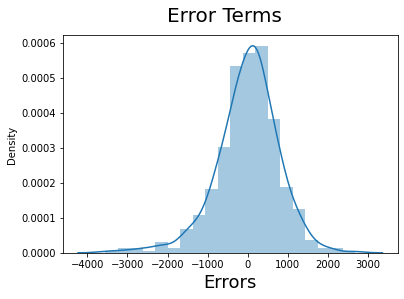

In [0]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

The error terms doesnt have any predictable pattern and have constant variance

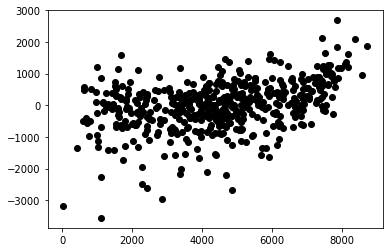

In [0]:
plt.plot(y_train, (y_train - y_train_cnt), 'o', color='black')
plt.show()

In [0]:
final_features

Out[42]: ['const',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_jul',
 'mnth_sept',
 'weekday_mon',
 'weathersit_Drizzle',
 'weathersit_Misty']

**We can infer "Error terms are normally distributed with mean zero" as per the first chart and also there is no predictable pattern in the second chart with constant variance , so the assumptions made with Linear regression are holds good**

In [0]:
final_features=[
 'yr',
 'holiday',
 'workingday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_jul',
 'mnth_sept',
 'weekday_mon',
 'weathersit_Drizzle',
 'weathersit_Misty']

df_test[num_vars] = scaler.transform(df_test[num_vars]) #Here we dont use fit_transform, we would use only transform based on the scaling on the training dataset

#Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[final_features]


# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [0]:
# Making predictions
y_pred = lr_model4.predict(X_test_new)

Out[45]: Text(0, 0.5, 'y_pred')

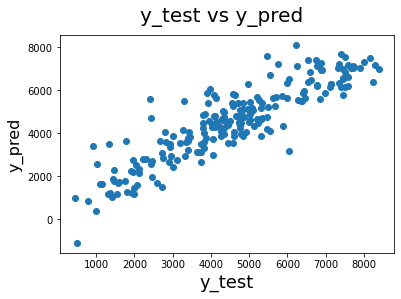

In [0]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

Out[46]: 0.7955789654753544

In [0]:
lr_model4.params 

Out[47]: const                 732.580867 
yr                    2019.177809
holiday              -512.798254 
workingday            407.901920 
temp                  4942.056768
windspeed            -1347.183854
season_summer         689.878388 
season_winter         1113.750375
mnth_jul             -334.255523 
mnth_sept             786.004550 
weekday_mon           510.312734 
weathersit_Drizzle   -2505.378688
weathersit_Misty     -719.702118 
dtype: float64

The final model looks like below ,

y = 732.580867 + (2019.177809 * yr) + (-512.798254  * holiday) + (407.901920  * workingday) + (4942.056768 * temp) + (-1347.183854 * windspeed) + (689.878388 
 * season_summer) + (1113.750375 * season_winter) +  (-334.255523 * mnth_jul) + ( 786.004550  * mnth_sept) +(510.312734 * weekday_mon) +(weathersit_Drizzle * -2505.378688 ) + (weathersit_Misty * -719.702118  ) 


**The R2 value of prediction on test dataset is  0.7955789654753544 which is pretty much close to the training dataset if we consider 5% as tolerance. Overall we have very good decent prediction model.** 
